<a href="https://www.kaggle.com/code/mh0386/car-price-prediction?scriptVersionId=127241715" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Presentation](https://tome.app/mh0386/revving-up-the-future-ai-powered-used-car-price-predictions-clgtjqlbx17hp1u41lb7yr442)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

# Data

In [2]:
try:
    data = pd.read_csv('/kaggle/input/cars-dataset-audi-bmw-ford-hyundai-skoda-vw/cars_dataset.csv')
except FileNotFoundError:
    data = pd.read_csv('cars_dataset.csv')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


## Nulls

In [5]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [6]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')

# Draw

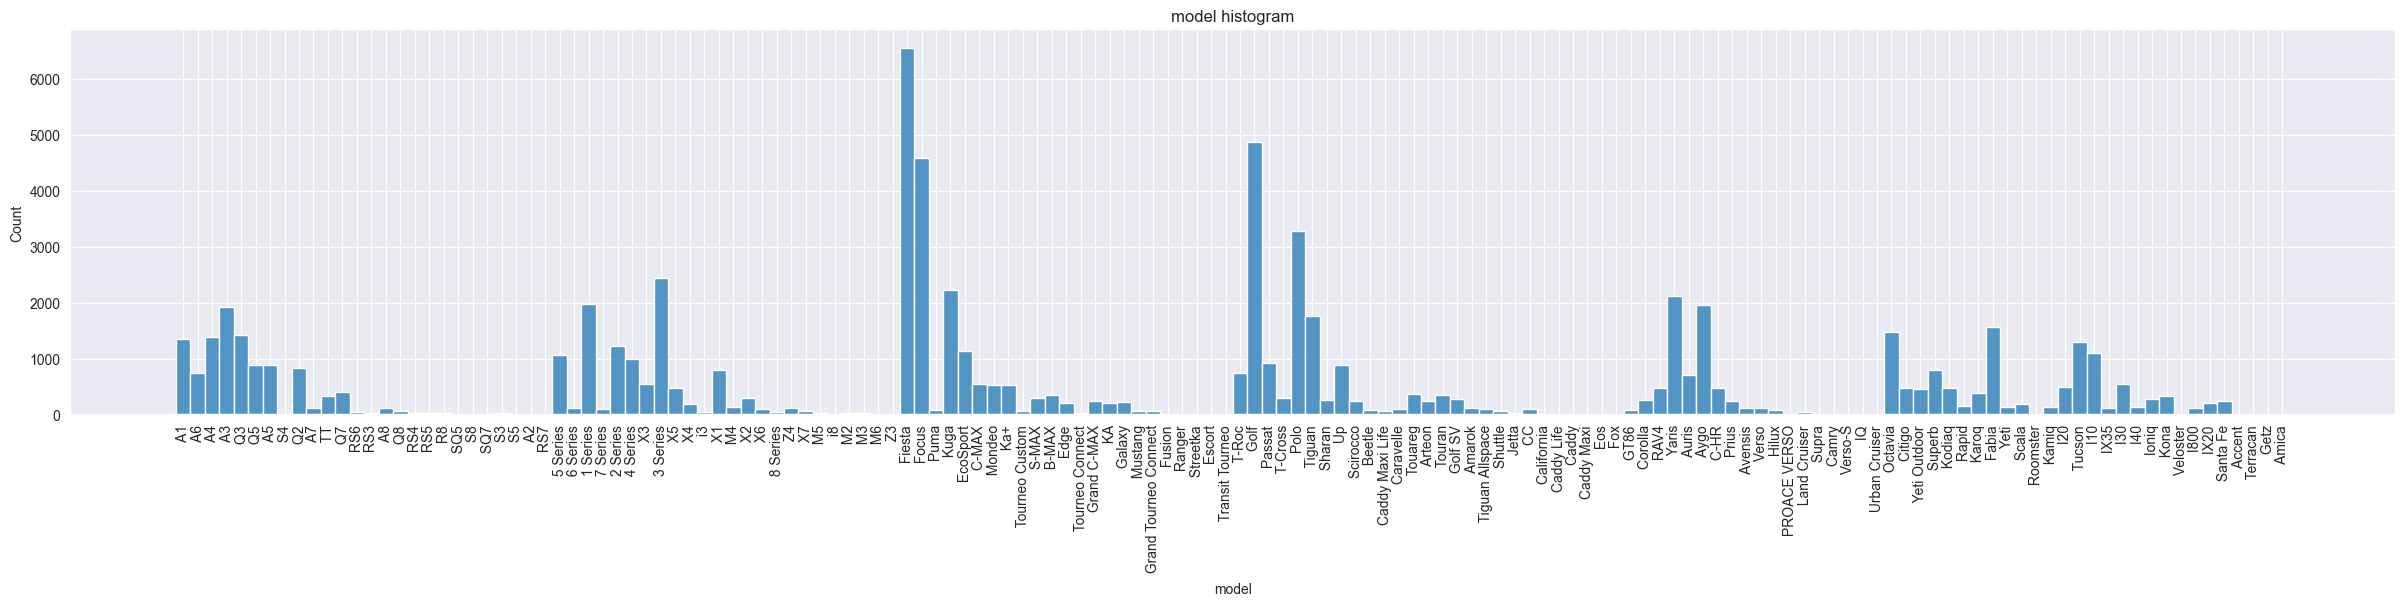

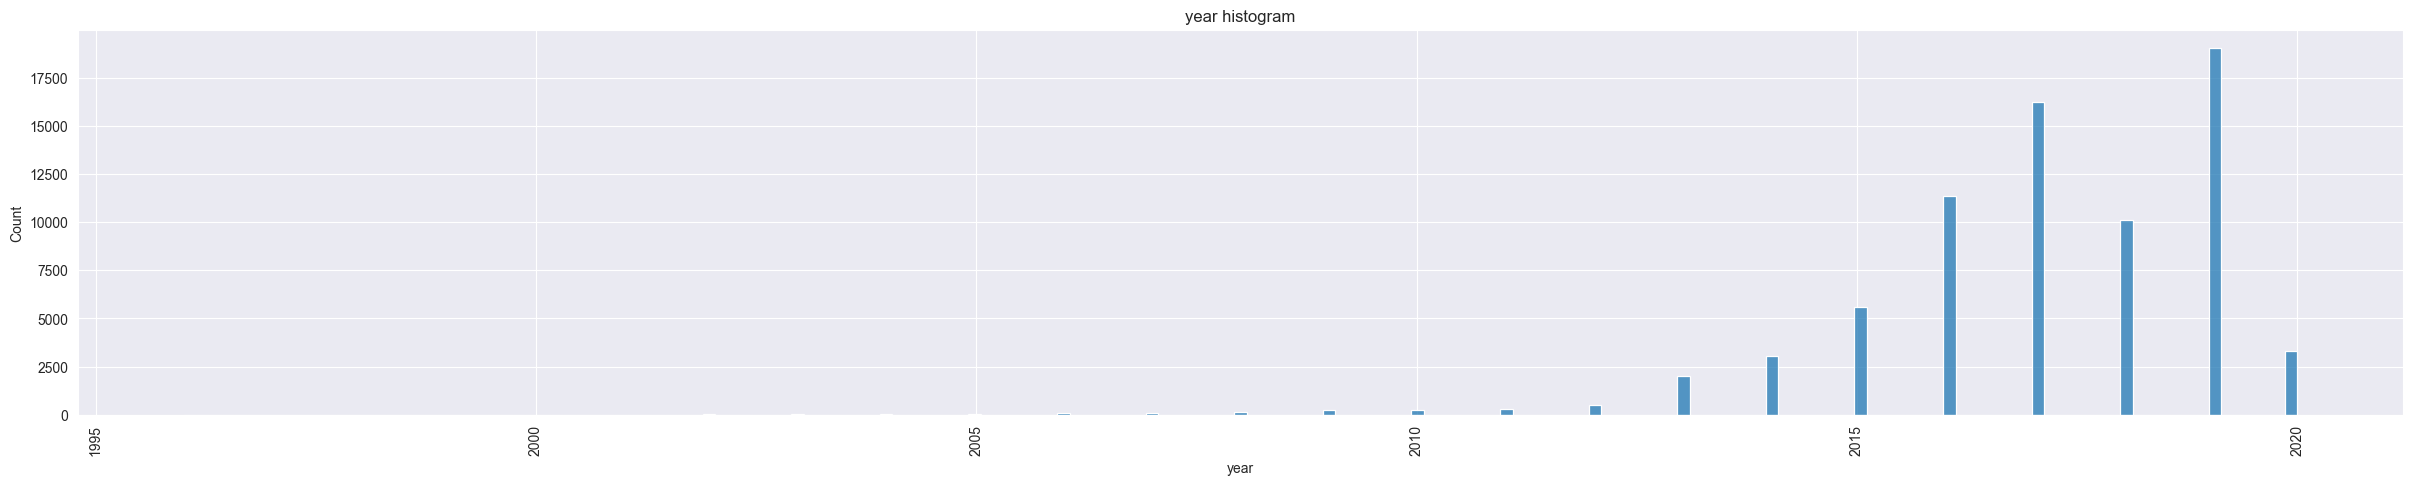

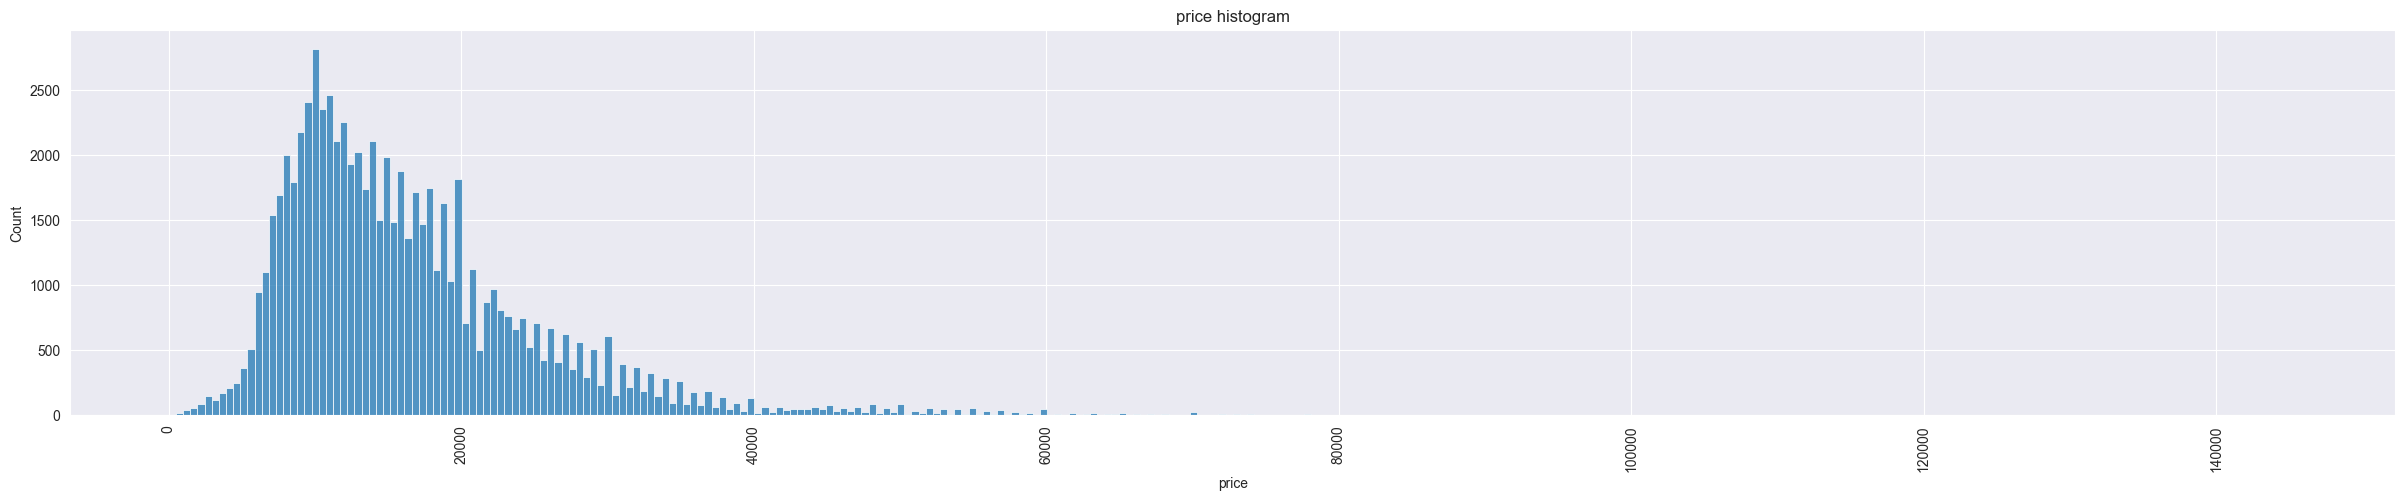

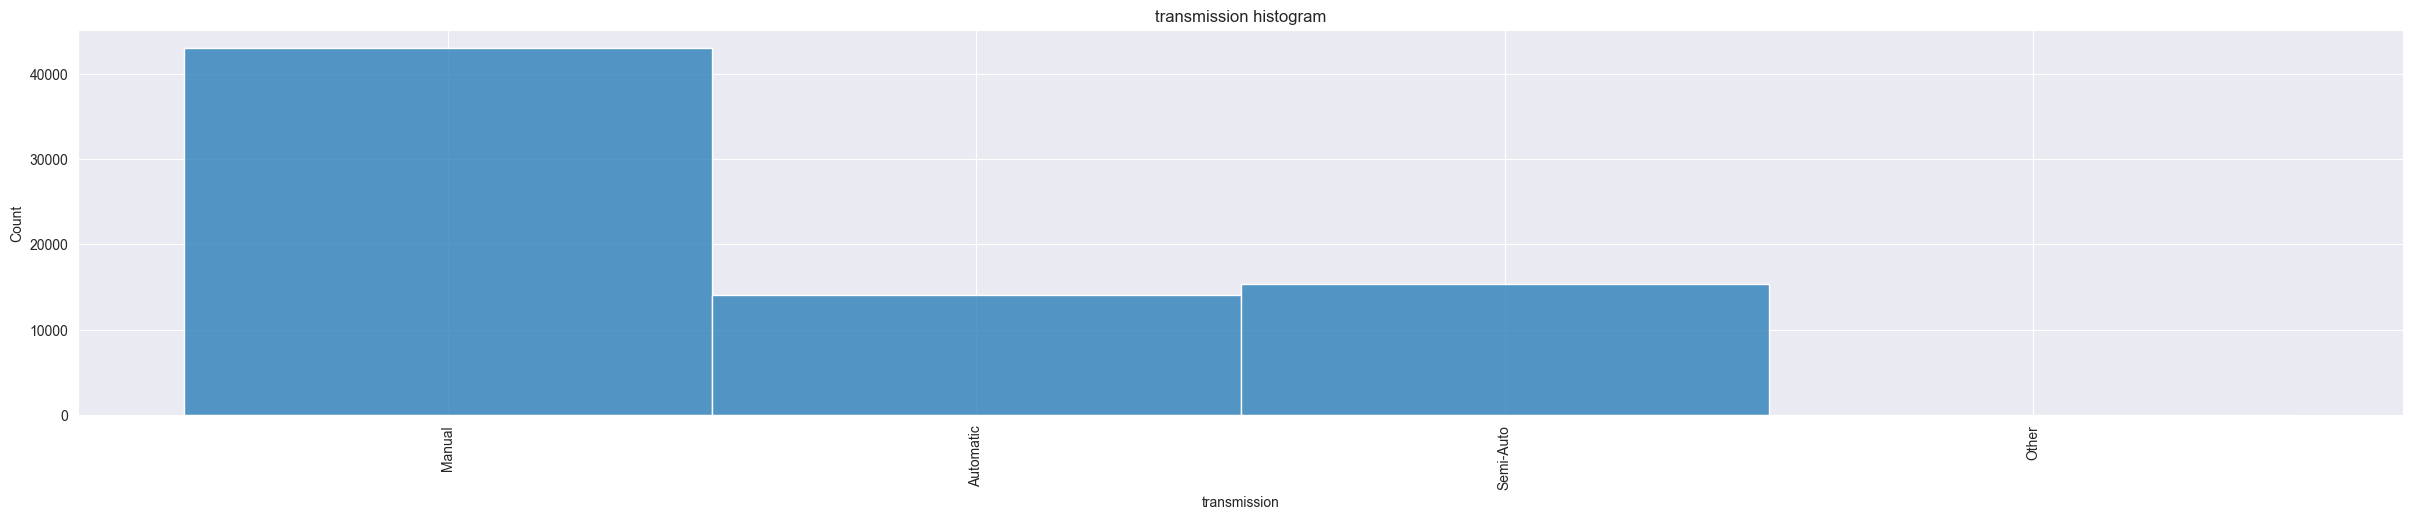

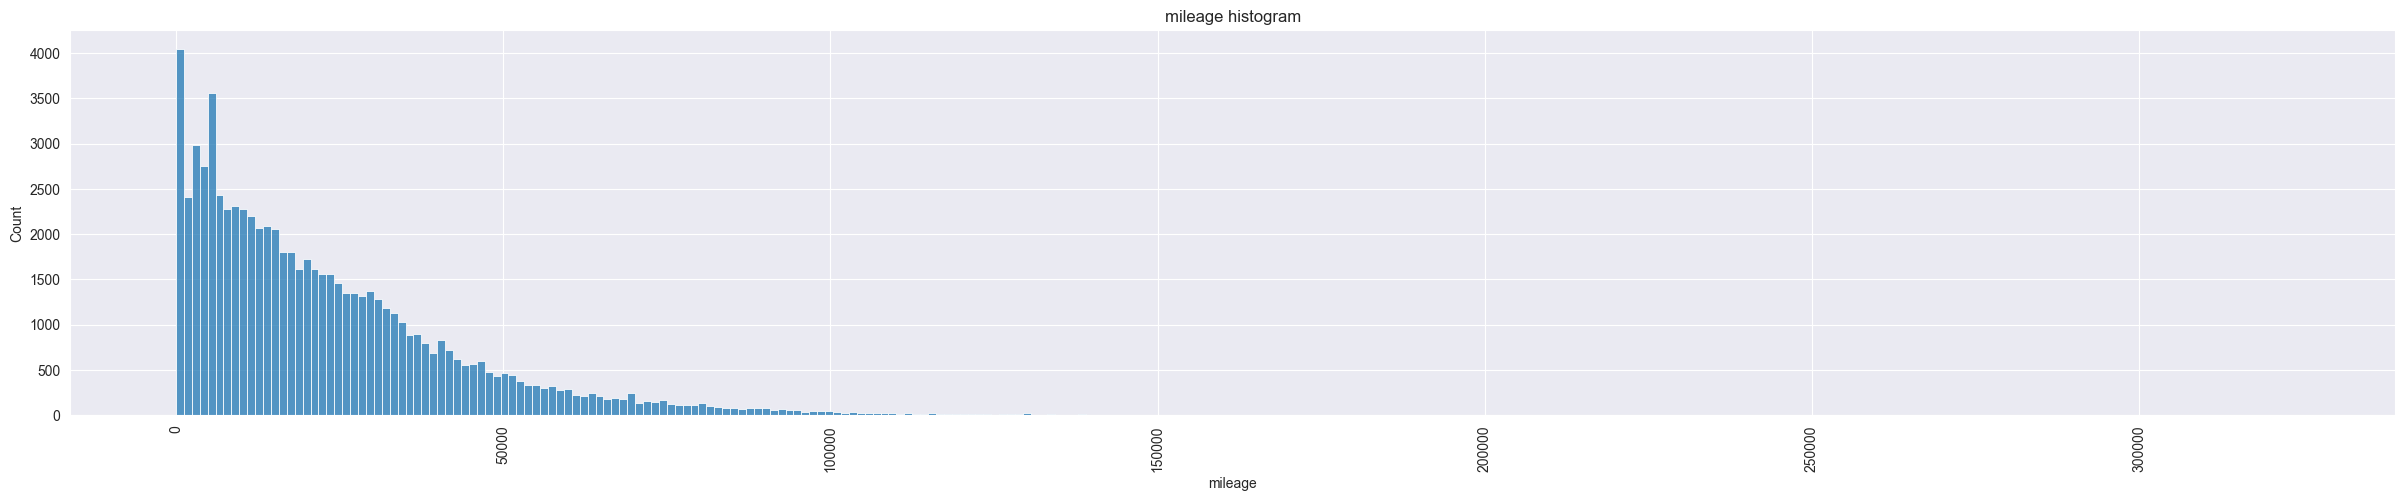

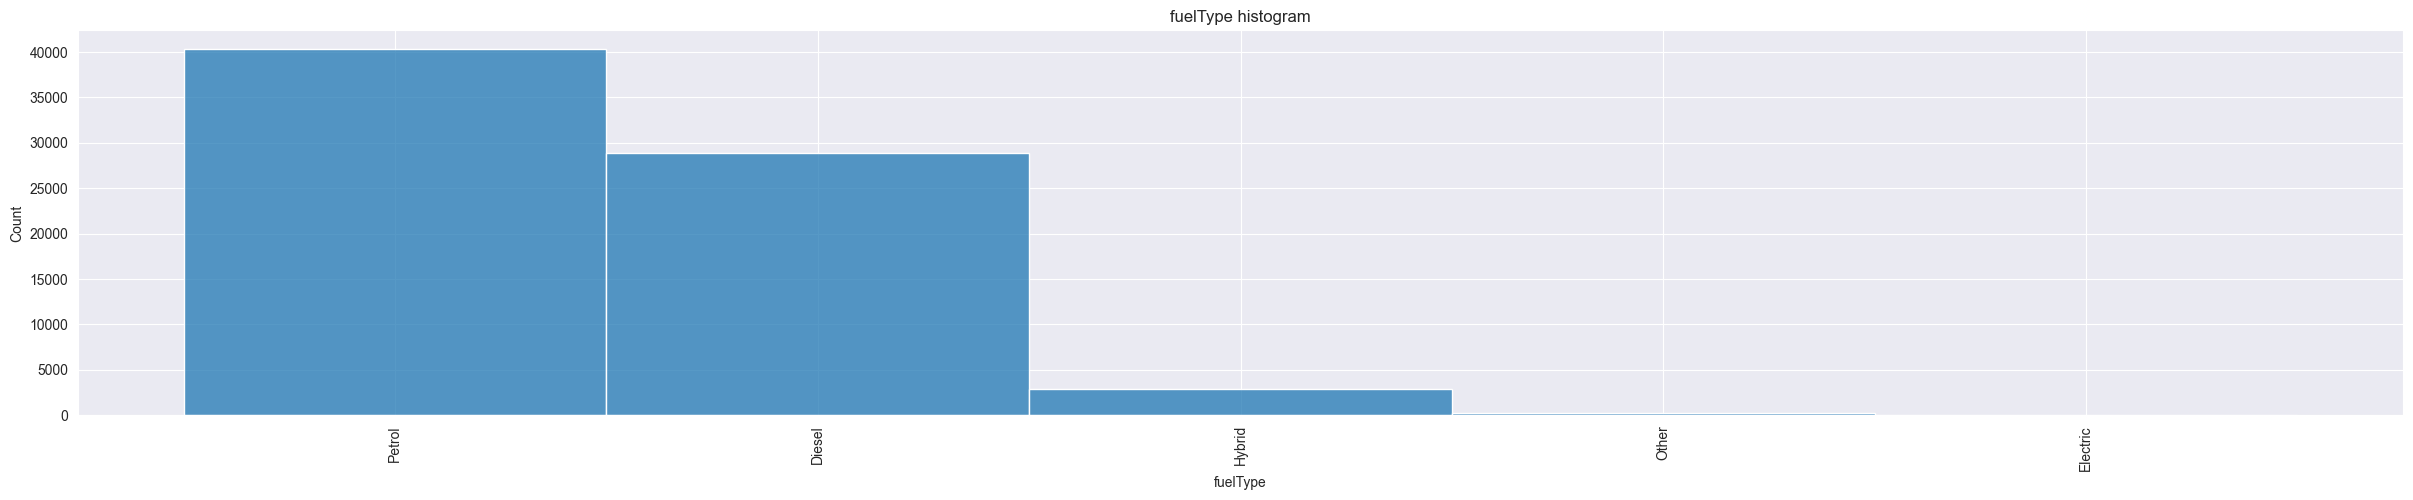

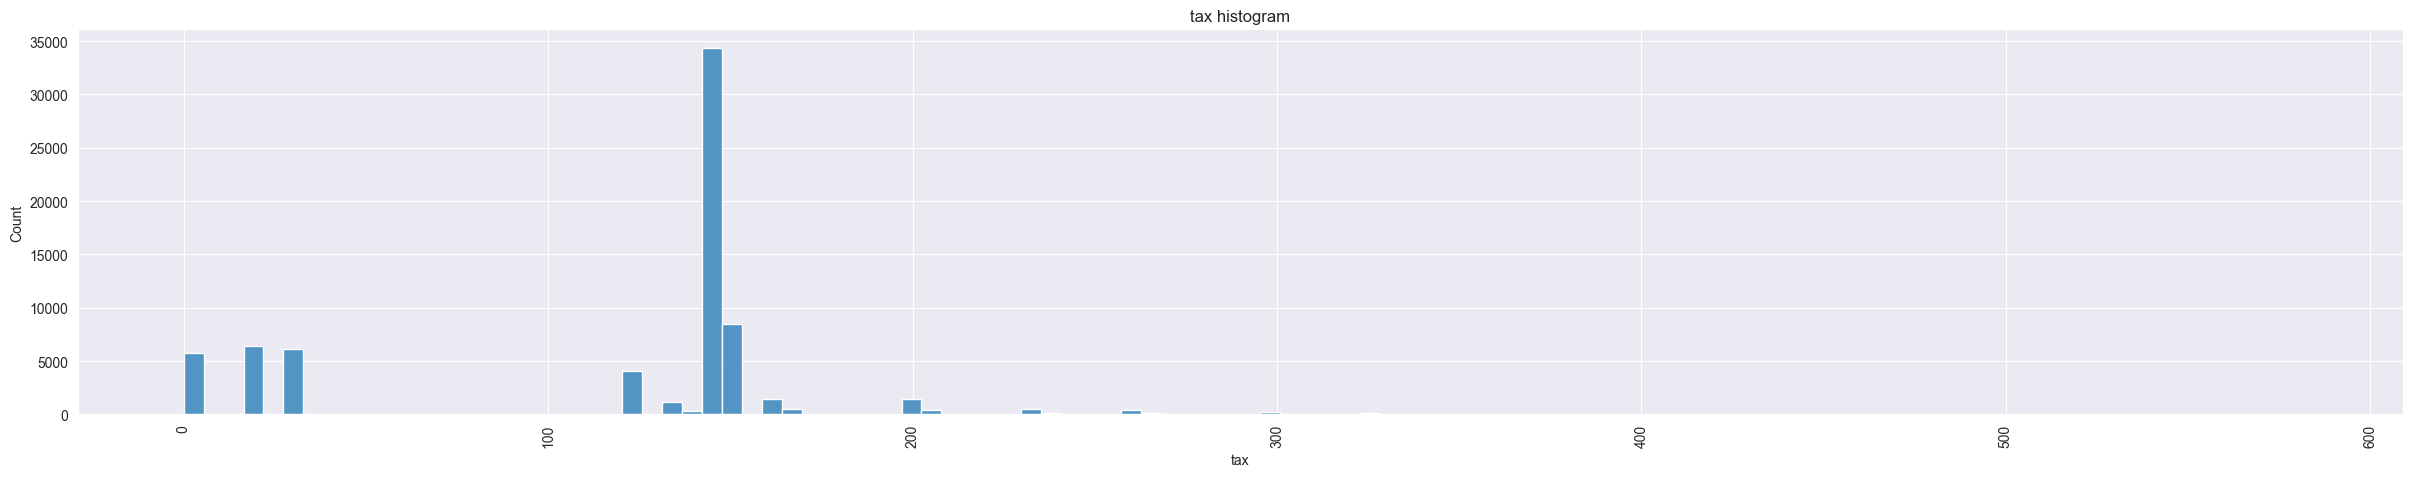

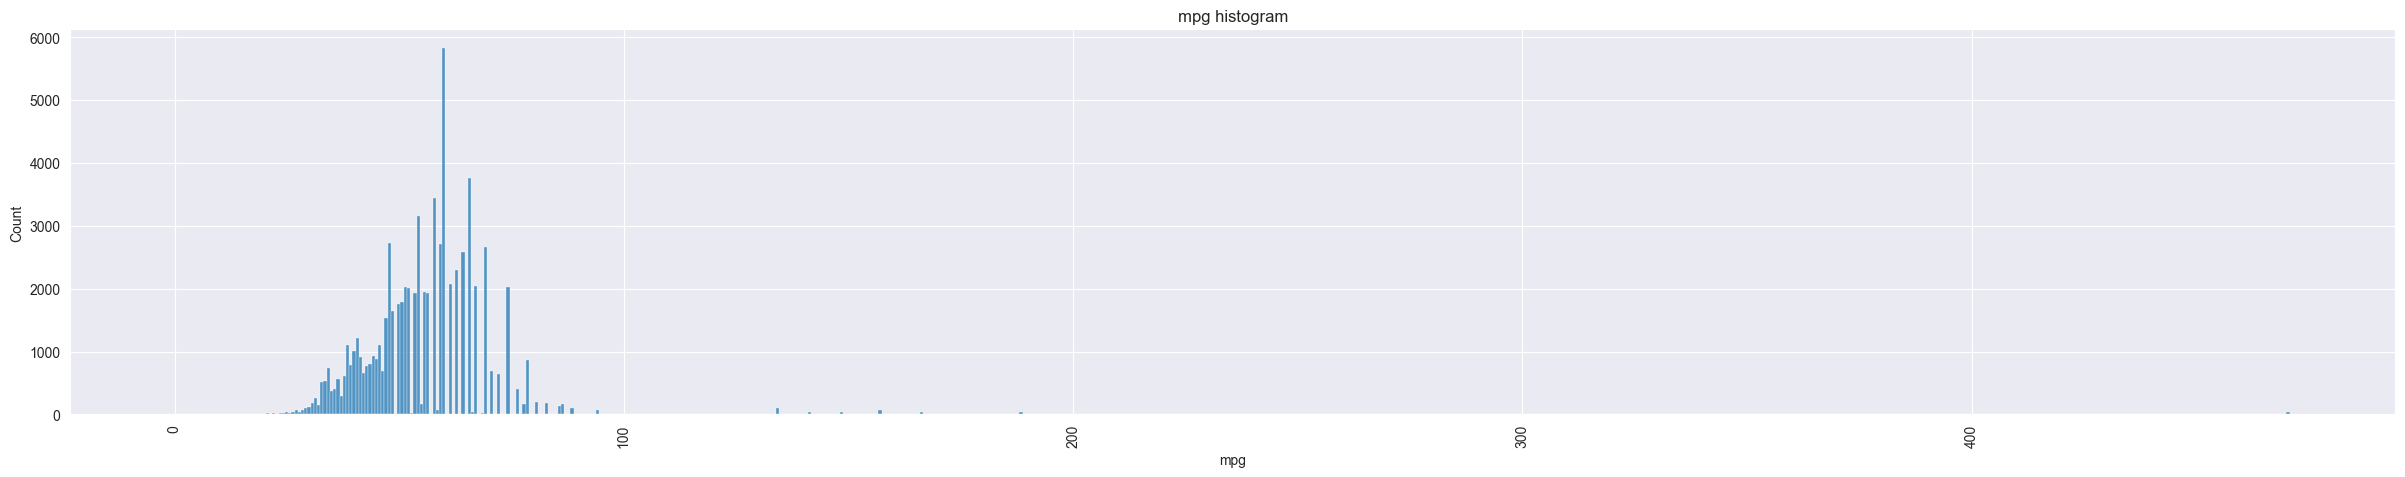

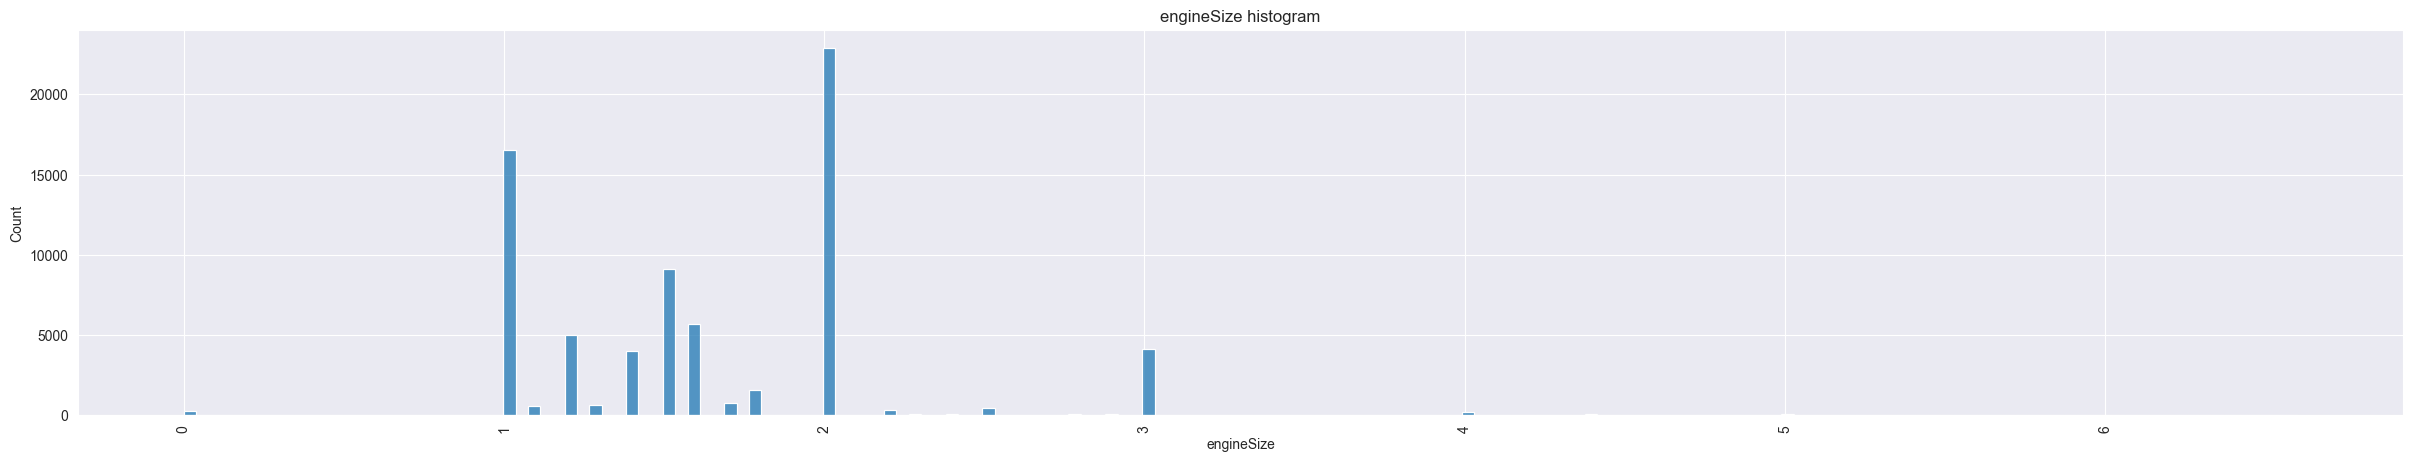

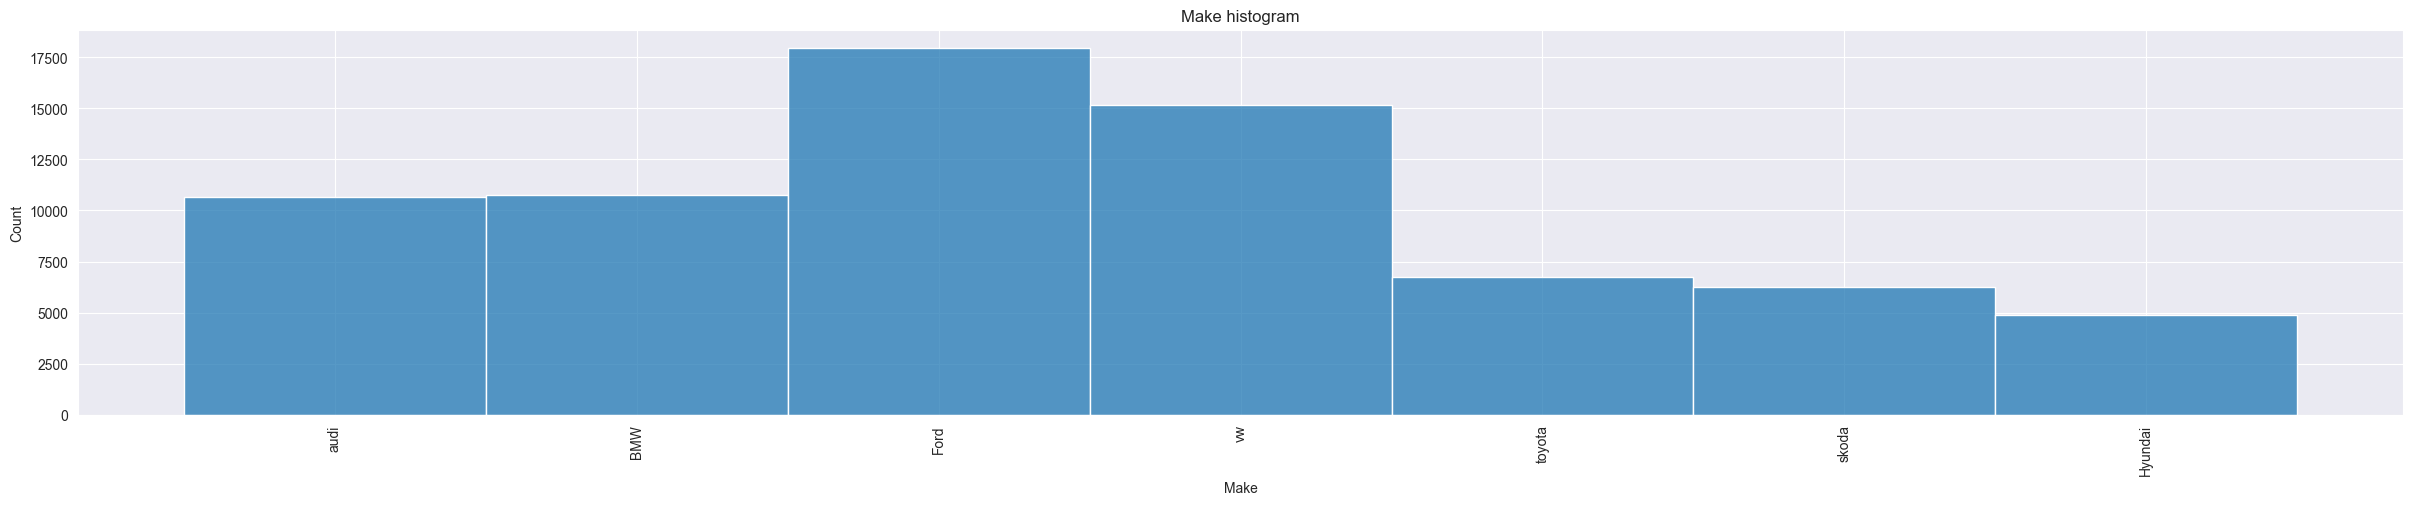

In [7]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(30, 5))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=data, x=col, ax=ax)
    plt.show()

In [8]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [9]:
data.model = preprocessing.LabelEncoder().fit_transform(data.model)
data.transmission = preprocessing.LabelEncoder().fit_transform(data.transmission)
data.fuelType = preprocessing.LabelEncoder().fit_transform(data.fuelType)
data.Make = preprocessing.LabelEncoder().fit_transform(data.Make)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,4,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,4,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,4,145.0,44.8,1.6,2


In [10]:
data.mileage = standardize(data.mileage)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,-0.348853,4,150.0,55.4,1.4,3
1,13,2016,16500,0,0.610673,0,20.0,64.2,2.0,3
2,8,2016,11000,1,0.317349,4,30.0,55.4,1.4,3
3,11,2017,16800,0,0.130113,0,145.0,67.3,2.0,3
4,10,2019,17300,1,-0.992834,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,0.127956,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,1.703195,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,-0.439096,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,0.006398,4,145.0,44.8,1.6,2


In [11]:
data.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
count,72435.000000,72435.000000,72435.000000,72435.000000,7.243500e+04,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,58.453855,2017.073666,16580.158708,1.230358,2.354252e-18,2.319431,116.953407,55.852480,1.635650,2.890702
std,41.229274,2.101252,9299.028754,0.994658,1.000007e+00,1.930699,64.045533,17.114391,0.561535,2.174535
min,0.000000,1996.000000,495.000000,0.000000,-1.086452e+00,0.000000,0.000000,0.300000,0.000000,0.000000
25%,25.000000,2016.000000,10175.000000,1.000000,-7.488510e-01,0.000000,30.000000,47.900000,1.200000,1.000000
50%,49.000000,2017.000000,14495.000000,1.000000,-2.646580e-01,4.000000,145.000000,55.400000,1.600000,3.000000
75%,85.000000,2019.000000,20361.000000,1.000000,4.346877e-01,4.000000,145.000000,62.800000,2.000000,5.000000
max,145.000000,2020.000000,145000.000000,3.000000,1.405552e+01,4.000000,580.000000,470.800000,6.600000,6.000000


# Split

In [12]:
data = shuffle(data)
y = data.price
data.drop('price', axis=1, inplace=True)
X = data

In [13]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
6880,85,2019,1,-0.939064,0,145.0,46.3,1.6,3
26921,23,2015,1,0.231513,4,30.0,55.4,1.0,1
31464,37,2019,1,-0.461035,4,145.0,51.4,1.0,1
37698,77,2015,1,2.420542,0,0.0,78.5,1.6,1
9678,10,2015,1,0.574201,0,0.0,74.3,1.6,3
...,...,...,...,...,...,...,...,...,...
63760,79,2016,1,2.226040,0,0.0,74.3,1.6,4
30317,43,2019,1,-0.789753,4,145.0,60.1,1.0,1
10895,134,2019,3,-0.627973,0,145.0,48.7,3.0,0
10179,11,2005,1,3.367036,4,300.0,34.9,2.0,3


In [14]:
y

6880     23997
26921     8995
31464    17495
37698     7295
9678     11899
         ...  
63760     7550
30317    14995
10895    37898
10179     2990
25002    18450
Name: price, Length: 72435, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

# Multiple Linear Regression

## Train

In [16]:
Model1 = LinearRegression()
Model1.fit(X_train, y_train)

LinearRegression()

## Predict

In [17]:
y_pred1 = Model1.predict(X_test)
y_pred1

array([19479.68906132, 17145.23125256, 18590.97082935, ...,
       17047.36216209, 20962.91209054, 10900.55611469])

## R2 Score

In [18]:
r2_score(y_test, y_pred1)

0.7286974570681319

## Mean Squared Error

In [19]:
mean_squared_error(y_test, y_pred1)

23036268.64176289

## Mean Absolute Error

In [20]:
mean_absolute_error(y_test, y_pred1)

3233.8637704756115

# Polynomial Regression

## Degree 2

In [21]:
poly = PolynomialFeatures(degree=2)
X_poly2 = poly.fit_transform(X)
X_poly2

array([[1.000e+00, 8.500e+01, 2.019e+03, ..., 2.560e+00, 4.800e+00,
        9.000e+00],
       [1.000e+00, 2.300e+01, 2.015e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 3.700e+01, 2.019e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 1.340e+02, 2.019e+03, ..., 9.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.100e+01, 2.005e+03, ..., 4.000e+00, 6.000e+00,
        9.000e+00],
       [1.000e+00, 7.000e+01, 2.019e+03, ..., 2.250e+00, 1.500e+00,
        1.000e+00]])

### Train

In [22]:
Model2 = LinearRegression()
Model2.fit(X_poly2, y)

LinearRegression()

### Predict

In [23]:
y_pred2 = Model2.predict(X_poly2)
y_pred2

array([21198.82877219,  8018.23429316, 14596.57937503, ...,
       45313.40348959,  4147.9148494 , 20438.13185334])

### R2 Score

## R2 Score

In [24]:
r2_score(y, y_pred2)

0.8230380150612109

## Mean Squared Error

## Mean Squared Error

In [25]:
mean_squared_error(y, y_pred2)

15302034.138792241

## Mean Absolute Error

## Mean Absolute Error

In [26]:
mean_absolute_error(y, y_pred2)

2571.637774536742

## Degree 3

In [27]:
poly = PolynomialFeatures(degree=3)
X_poly3 = poly.fit_transform(X)
X_poly3

array([[1.000e+00, 8.500e+01, 2.019e+03, ..., 7.680e+00, 1.440e+01,
        2.700e+01],
       [1.000e+00, 2.300e+01, 2.015e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 3.700e+01, 2.019e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 1.340e+02, 2.019e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.100e+01, 2.005e+03, ..., 1.200e+01, 1.800e+01,
        2.700e+01],
       [1.000e+00, 7.000e+01, 2.019e+03, ..., 2.250e+00, 1.500e+00,
        1.000e+00]])

### Train

In [28]:
Model3 = LinearRegression()
Model3.fit(X_poly3, y)

LinearRegression()

### Predict

In [29]:
y_pred3 = Model3.predict(X_poly3)
y_pred3

array([21587.77428246,  8633.00148201, 13610.74242592, ...,
       43436.56658745,  4027.11285973, 19107.23930931])

### R2 Score

In [30]:
r2_score(y, y_pred3)

0.8768307129321362

### Mean Squared Error

In [31]:
mean_squared_error(y, y_pred3)

10650539.64112734

### Mean Absolute Error

In [32]:
mean_absolute_error(y, y_pred3)

2147.2162490653823

In [ ]:
r2 = []
mse = []
mae = []
for i in range(10):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    Model = LinearRegression()
    Model.fit(X_poly, y)
    y_pred = Model.predict(X_poly)
    print(f'Degree {i}')
    print(f'R2 Score: {r2_score(y, y_pred)}')
    r2.append(r2_score(y, y_pred))
    print(f'Mean Squared Error: {mean_squared_error(y, y_pred)}')
    mse.append(mean_squared_error(y, y_pred))
    print(f'Mean Absolute Error: {mean_absolute_error(y, y_pred)}')
    mae.append(mean_absolute_error(y, y_pred))
    print()

Degree 0
R2 Score: 0.0
Mean Squared Error: 86470741.97367978
Mean Absolute Error: 6726.593076752941

Degree 1
R2 Score: 0.7211814605516025
Mean Squared Error: 24109645.98212064
Mean Absolute Error: 3269.6979377401854

Degree 2
R2 Score: 0.8230380150612109
Mean Squared Error: 15302034.138792241
Mean Absolute Error: 2571.637774536742

Degree 3
R2 Score: 0.8768307129321362
Mean Squared Error: 10650539.64112734
Mean Absolute Error: 2147.2162490653823

Degree 4
R2 Score: 0.917574156654502
Mean Squared Error: 7127423.831891502
Mean Absolute Error: 1820.4716365664842

Degree 5
R2 Score: 0.9146356905651718
Mean Squared Error: 7381515.174900391
Mean Absolute Error: 1844.6332905729225

Degree 6
R2 Score: 0.9494494217618727
Mean Squared Error: 4371146.00744941
Mean Absolute Error: 1384.3937678190955

Degree 7
R2 Score: 0.951345273917018
Mean Squared Error: 4207210.264921609
Mean Absolute Error: 1358.8092638706808



In [ ]:
# draw r2 with mse and mae togther
fig, ax = plt.subplots(figsize=(30, 5))
ax.tick_params(axis='x', rotation=90)
plt.title(f'R2 Score')
sns.lineplot(x=range(10), y=r2, ax=ax)
plt.show()

In [ ]:
# draw mse with r2 and mae togther
fig, ax = plt.subplots(figsize=(30, 5))
ax.tick_params(axis='x', rotation=90)
plt.title(f'Mean Squared Error')
sns.lineplot(x=range(10), y=mse, ax=ax)
plt.show()

In [ ]:
# draw mae with r2 and mse togther
fig, ax = plt.subplots(figsize=(30, 5))
ax.tick_params(axis='x', rotation=90)
plt.title(f'Mean Absolute Error')
sns.lineplot(x=range(10), y=mae, ax=ax)
plt.show()

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(range(10), r2, label='R2 Score')
plt.plot(range(10), mse, label='Mean Squared Error')
plt.plot(range(10), mae, label='Mean Absolute Error')
plt.legend()
plt.show()